In [1]:
from model.RAFS import RAFS

model = RAFS(faiss_index='/home/kdh/code/BME_Capstone1/BME_faiss.index',
             faiss_json='/home/kdh/code/BME_Capstone1/faiss_idx.json',
             n=8)

Using cache found in /home/kdh/.cache/torch/hub/facebookresearch_dinov2_main
/home/kdh/.cache/torch/hub/facebookresearch_dinov2_main/dinov2/layers/swiglu_ffn.py:51: UserWarning: xFormers is not available (SwiGLU)
  warnings.warn("xFormers is not available (SwiGLU)")
/home/kdh/.cache/torch/hub/facebookresearch_dinov2_main/dinov2/layers/attention.py:33: UserWarning: xFormers is not available (Attention)
  warnings.warn("xFormers is not available (Attention)")
/home/kdh/.cache/torch/hub/facebookresearch_dinov2_main/dinov2/layers/block.py:40: UserWarning: xFormers is not available (Block)
  warnings.warn("xFormers is not available (Block)")


In [2]:
import nibabel as nib
mri = nib.load('/home/kdh/code/BME_Capstone1/data/NFBS_Dataset/A00028185/sub-A00028185_ses-NFB3_T1w.nii.gz').get_fdata()
target_mri = mri[:, 90, :]
msk = nib.load('/home/kdh/code/BME_Capstone1/data/NFBS_Dataset/A00028185/sub-A00028185_ses-NFB3_T1w_brainmask.nii.gz').get_fdata()
target_msk = msk[:, 90, :]

(-0.5, 255.5, 255.5, -0.5)

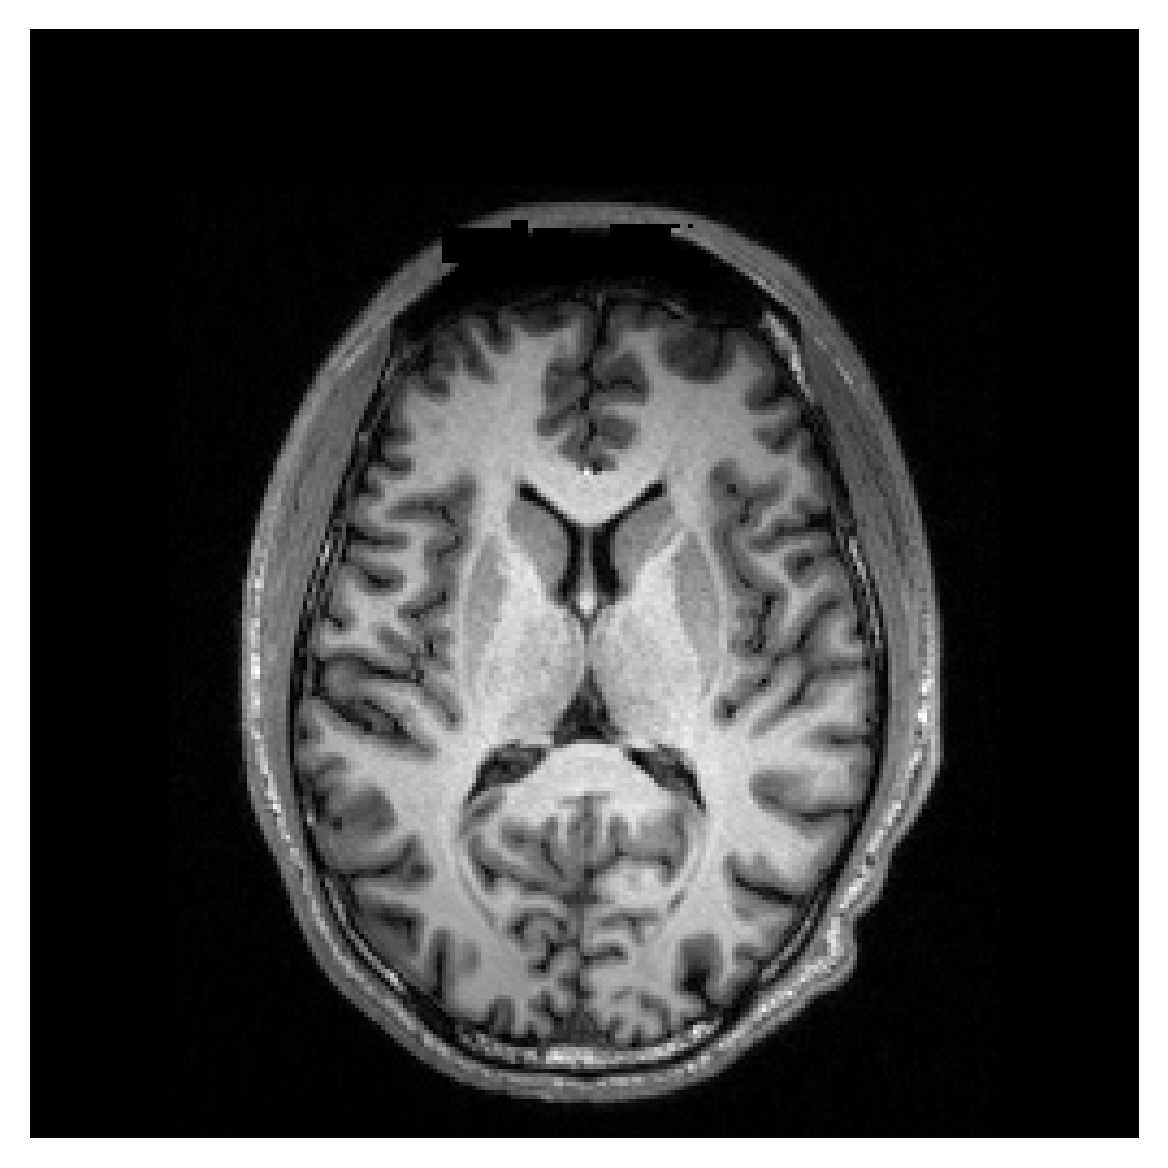

In [14]:
import matplotlib.pyplot as plt
from processor import processor
plt.figure(dpi=100)
plt.imshow(processor(target_mri, mode='sam').permute(1,2,0))
plt.axis('off')

In [4]:
import numpy as np
retrieved = model.retrieval_module(processor(target_mri.astype(np.float32), mode='dino'))

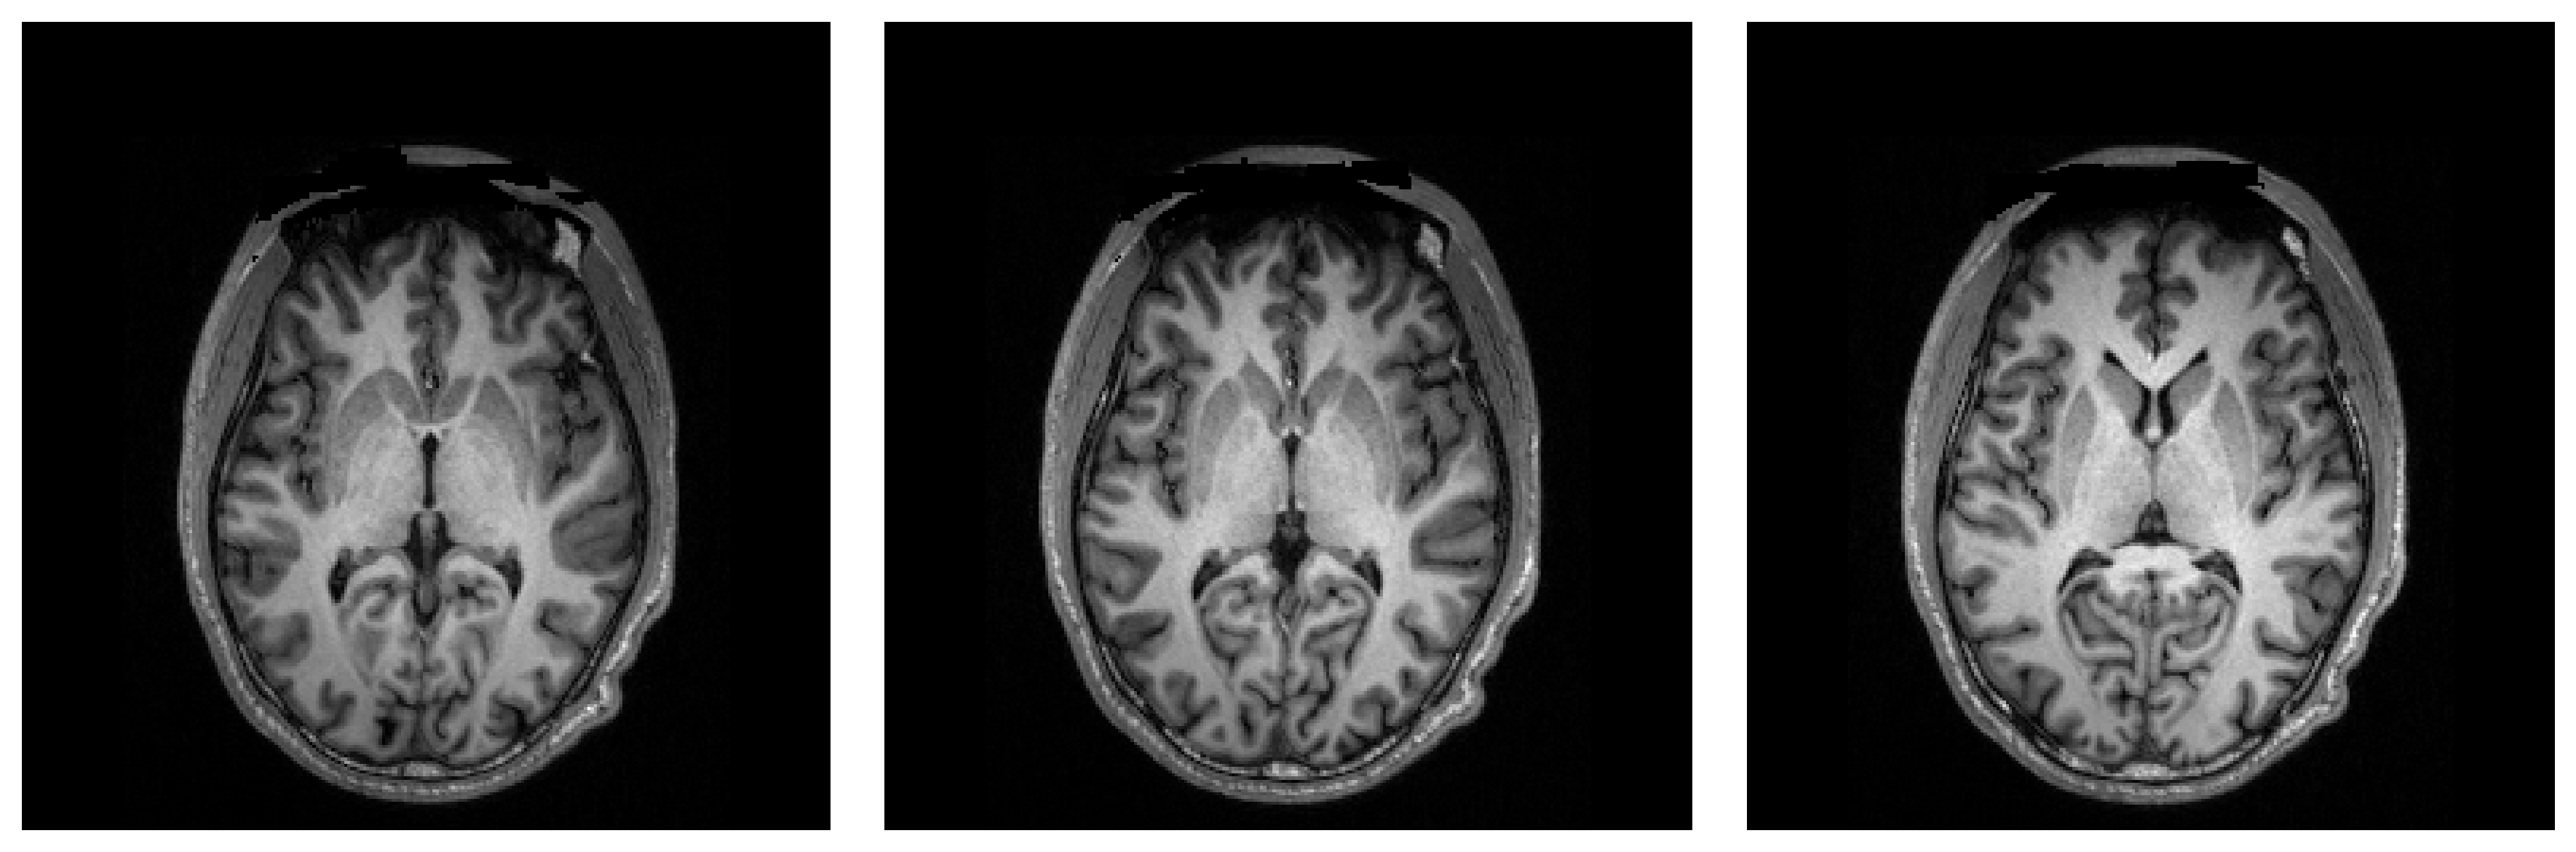

In [9]:
plt.figure(dpi=300, figsize=(12, 4))
for i in range(3):
    plt.subplot(1, 3, i+1)
    plt.imshow(retrieved['image'][i].permute(1,2,0))
    plt.axis('off')
plt.tight_layout()

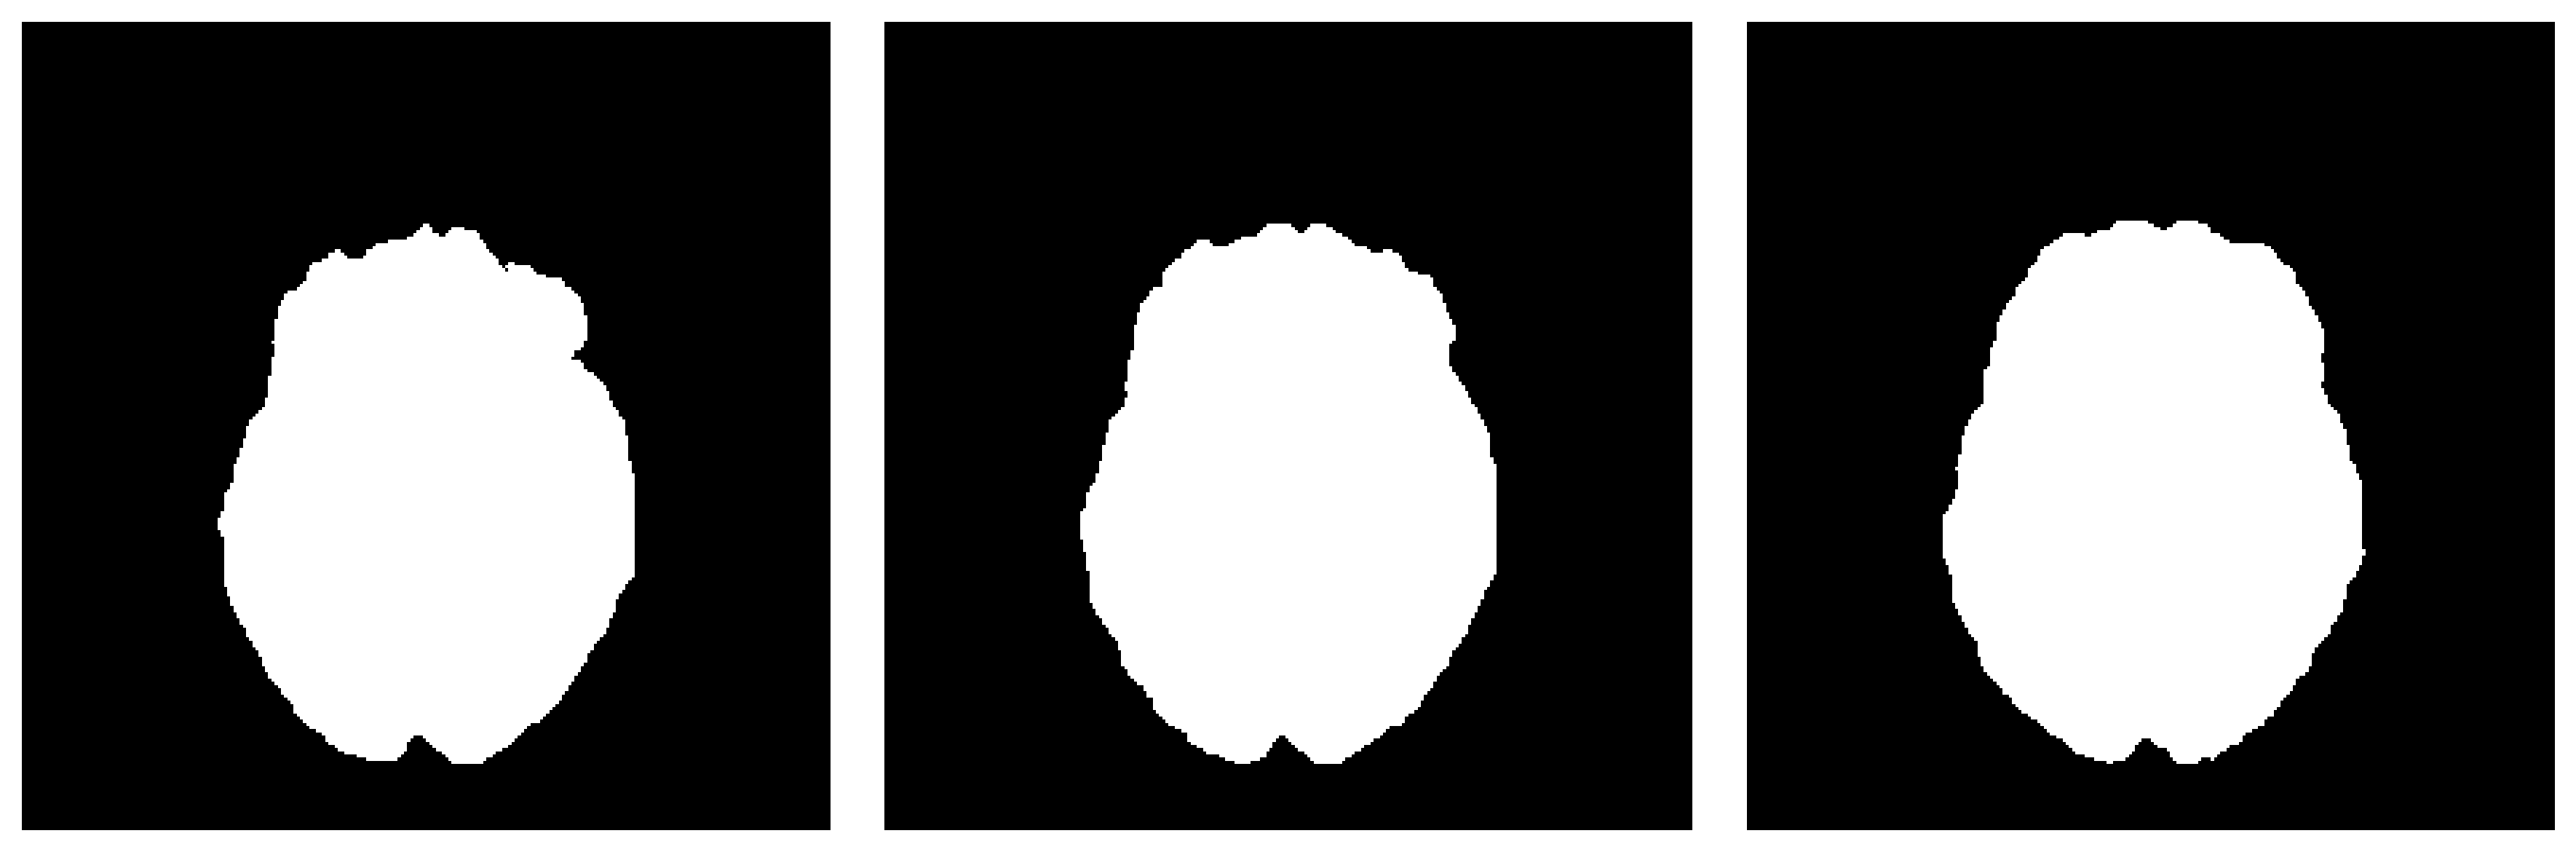

In [15]:
plt.figure(dpi=300, figsize=(12, 4))
for i in range(3):
    plt.subplot(1, 3, i+1)
    plt.imshow(retrieved['mask'][i][0], cmap='gray')#.permute(1,2,0))
    plt.axis('off')
plt.tight_layout()

<Figure size 10800x1200 with 0 Axes>

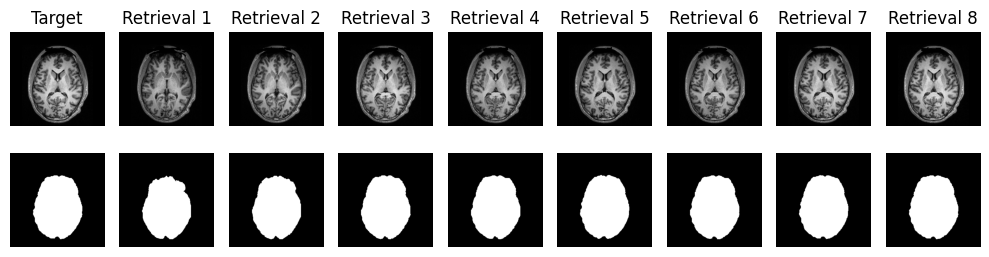

In [8]:
from utils import visualize_retrieval
target = {'image' : processor(target_mri, mode='sam'), 'mask' : processor(target_msk, mode='mask')}
plt.figure(dpi=300, figsize=(36, 4))
visualize_retrieval(retrieved, target)

In [16]:
import matplotlib.pyplot as plt
out = model(target_mri.astype(np.float32))

In [17]:
import matplotlib.pyplot as plt
from processor import processor
tmri = processor(target_mri, mode='sam')
tmsk = processor(target_msk, mode='mask')

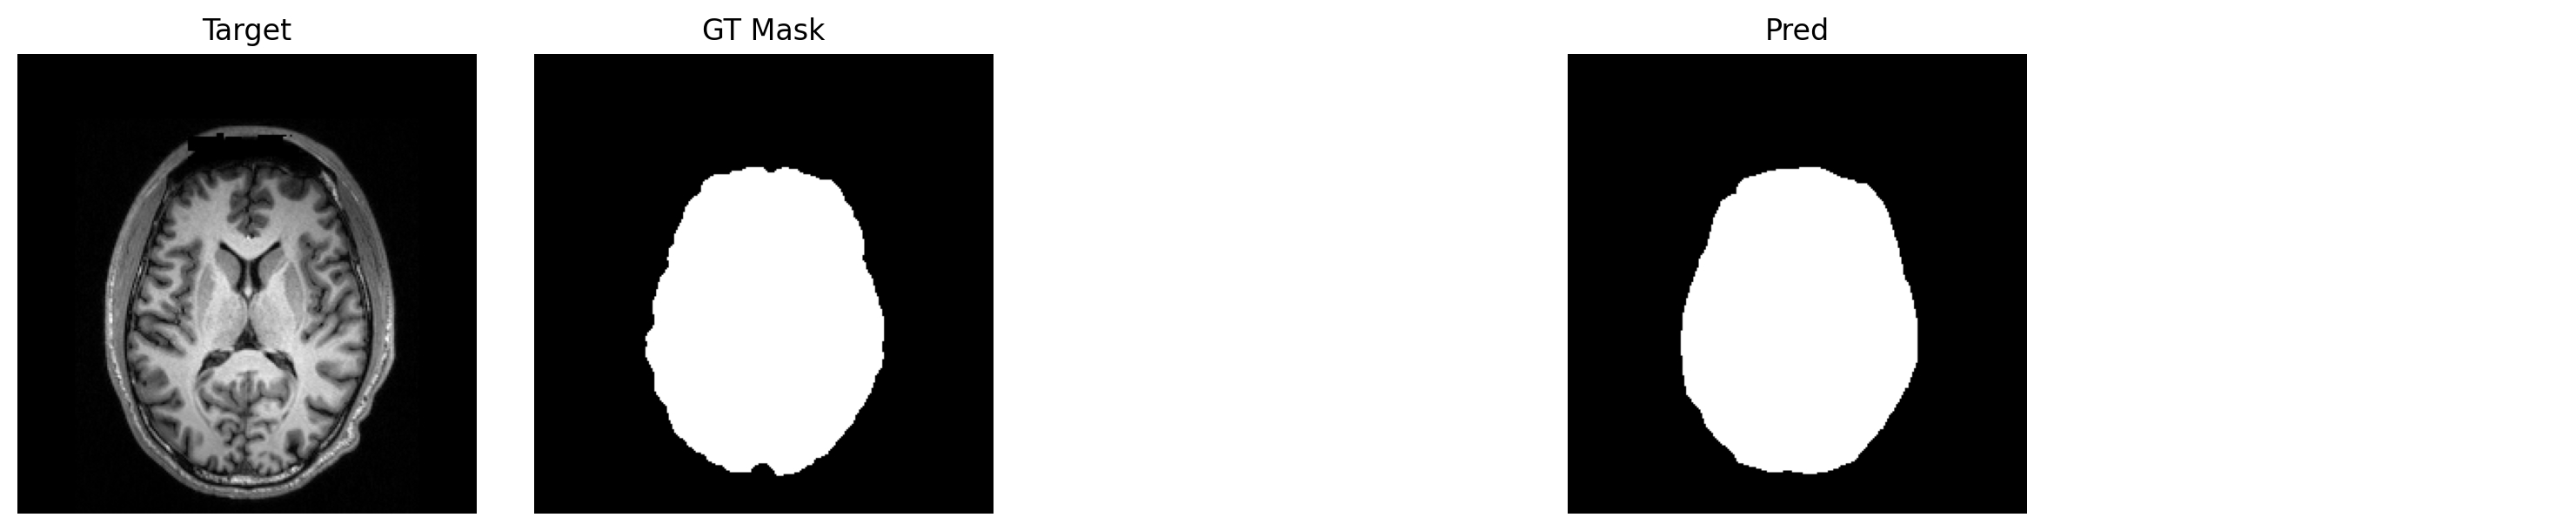

In [11]:
plt.figure(dpi=200, figsize=(15, 3))

plt.subplot(1, 5, 1)
plt.imshow(tmri.permute(1,2,0), cmap='gray')
plt.title('Target')
plt.axis('off')

plt.subplot(1, 5, 2)
plt.imshow(tmsk[0], cmap='gray')
plt.title('GT Mask')
plt.axis('off')

plt.subplot(1, 5, 4)
plt.imshow(out[0][0, 0], cmap='gray')
plt.title('Pred')
plt.axis('off')

plt.subplot(1, 5, 5)
plt.axis("off")

plt.tight_layout()

(-0.5, 255.5, 255.5, -0.5)

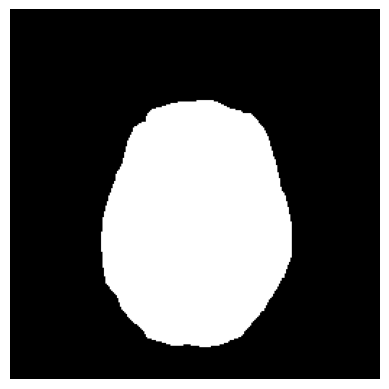

In [19]:
plt.imshow(out[0][0, 0], cmap='gray')
#plt.title('Pred')
plt.axis('off')

In [ ]:
['A00060407' 'A00028185' 'A00060925']